In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
# Load data
data = pd.read_csv("AAPL_data.csv")
# Select only the 'close' column
data = data[['close']]

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [5]:
train_size = int(len(data_scaled) * 0.7)
test_size = len(data_scaled) - train_size

In [7]:
train = data.iloc[:train_size]  # Training set
test = data.iloc[train_size:]   # Test set

In [21]:
p, d, q = 1, 1, 1  # Non-seasonal ARIMA parameters
P, D, Q, m = 1, 1, 1, 6

In [22]:
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, m),
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False)

In [23]:
test_predict = sarima_fit.predict(start=train_size, end=len(data)-1, dynamic=False)


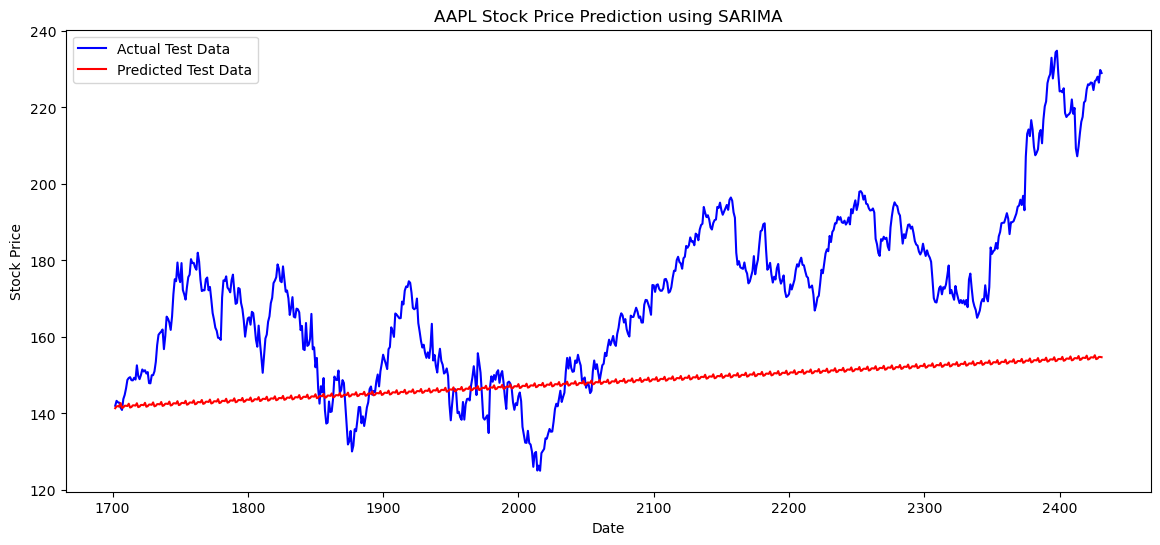

1702    141.366793
1703    141.846737
1704    141.906374
1705    141.762268
1706    142.698396
Name: predicted_mean, dtype: float64


In [24]:
# Plotting the actual vs predicted values
plt.figure(figsize=(14, 6))
plt.plot(data.index[train_size:], test, color='blue', label='Actual Test Data')
plt.plot(data.index[train_size:], test_predict, color='red', label='Predicted Test Data')
plt.legend()
plt.title('AAPL Stock Price Prediction using SARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# Displaying the first few predicted values
print(test_predict.head())